In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
sales_of_company_x

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36
...,...,...
72,1971-01,628
73,1971-02,308
74,1971-03,324
75,1971-04,248


In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [5]:
all_series

{'Monthly sales of company X': 0     154
 1      96
 2      73
 3      49
 4      36
      ... 
 72    628
 73    308
 74    324
 75    248
 76    272
 Name: Count, Length: 77, dtype: int64,
 'Monthly Boston armed robberies': 0       41
 1       39
 2       50
 3       40
 4       43
       ... 
 113    316
 114    398
 115    394
 116    431
 117    431
 Name: Count, Length: 118, dtype: int64,
 'International airline passengers: monthly totals in thousands': 0      112
 1      118
 2      132
 3      129
 4      121
       ... 
 139    606
 140    508
 141    461
 142    390
 143    432
 Name: Count, Length: 144, dtype: int64,
 'Mean monthly air temperature (Deg. F) Nottingham Castle': 0      40.6
 1      40.8
 2      44.4
 3      46.7
 4      54.1
        ... 
 235    61.8
 236    58.2
 237    46.7
 238    46.6
 239    37.8
 Name: Deg, Length: 240, dtype: float64,
 'Weekly closings of the Dow-Jones industrial average': 0      890.19
 1      901.80
 2      888.51
 3      887.78
 4    

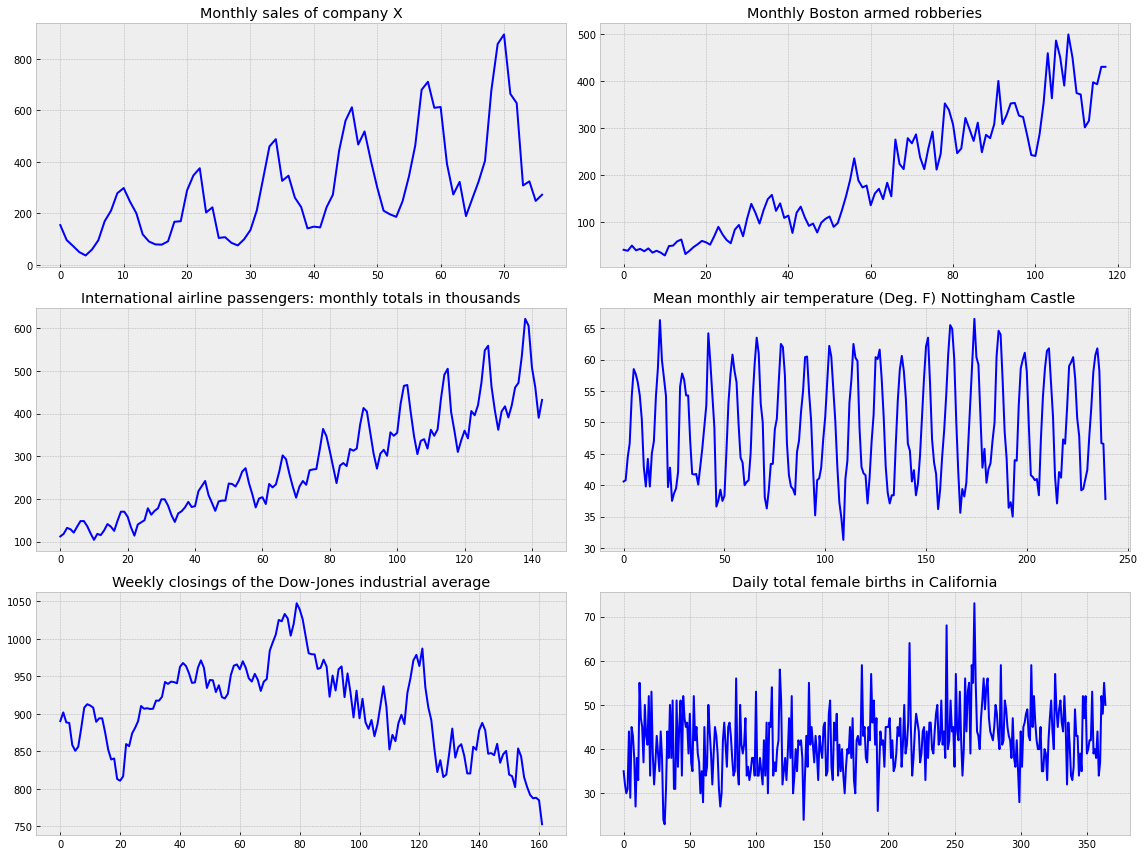

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 12))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Проверяем ряды на стационарность

Ищем сезонность

In [7]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

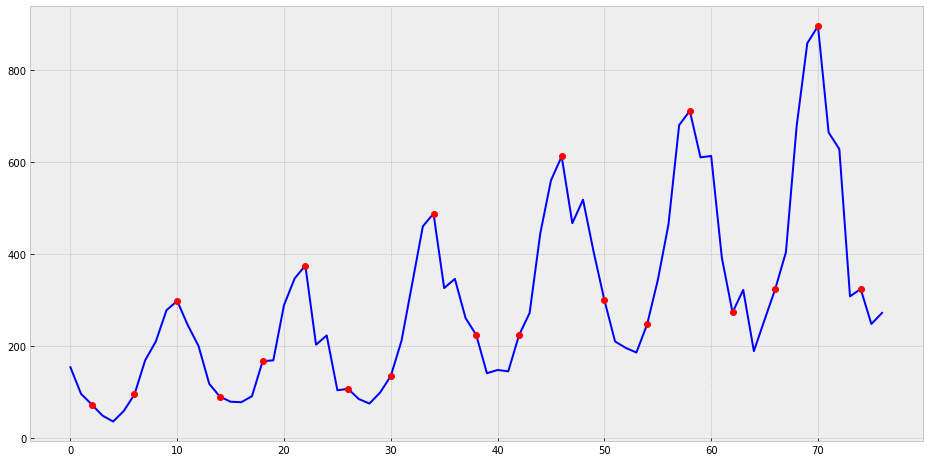

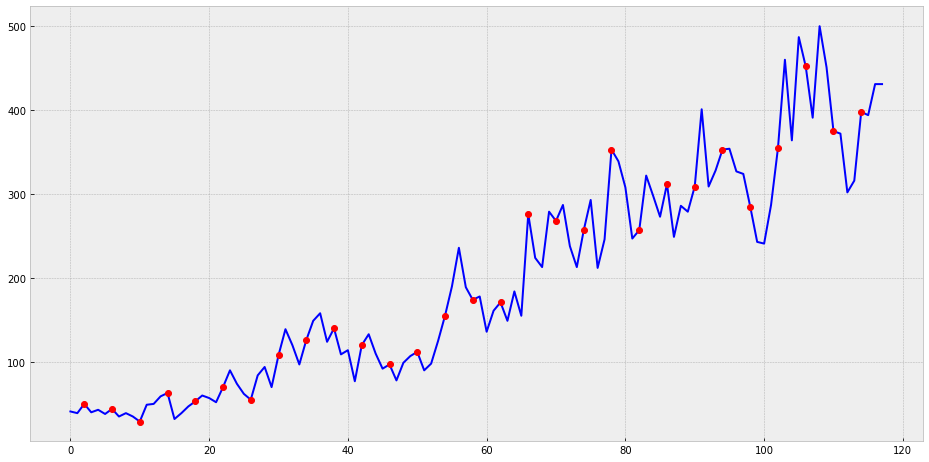

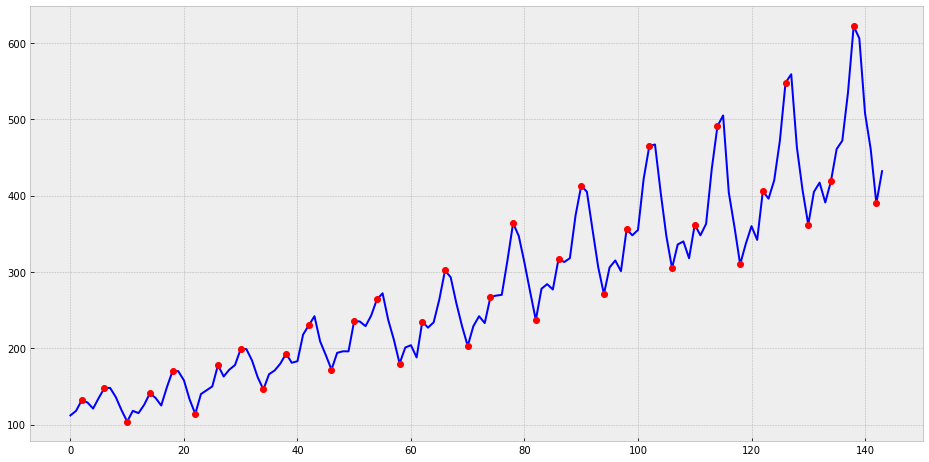

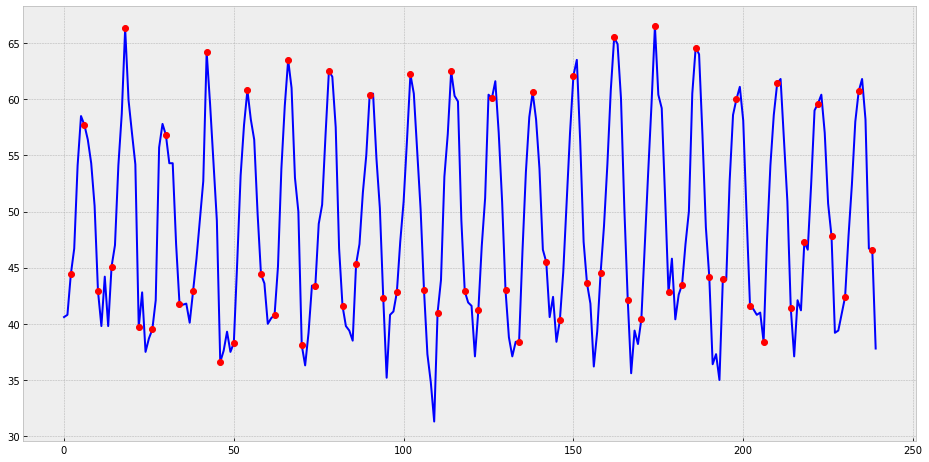

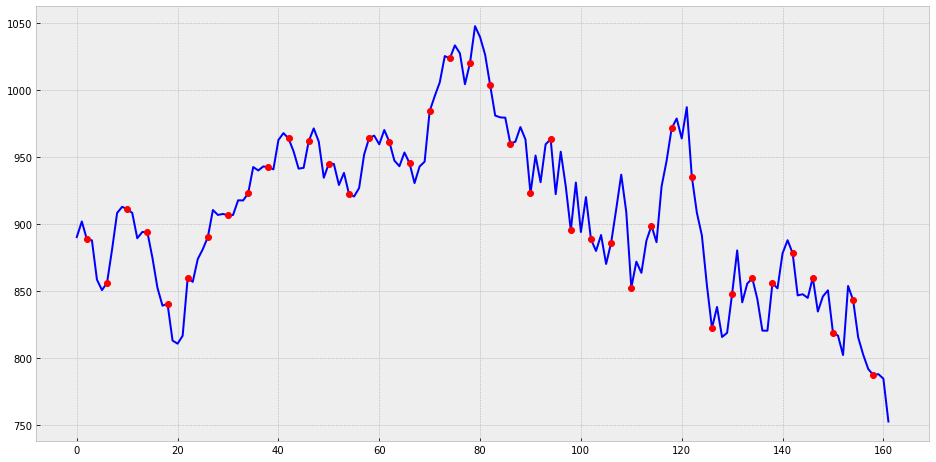

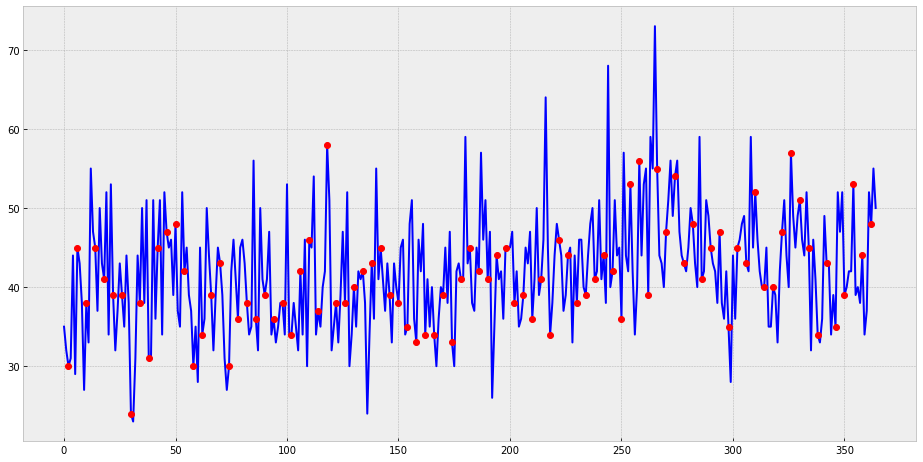

In [8]:
plot_ts_and_points(sales_of_company_x['Count'], 2, 4)
plot_ts_and_points(robberies_in_boston['Count'], 2, 4)
plot_ts_and_points(airlines_passengers['Count'], 2, 4)
plot_ts_and_points(mean_monthly_temp['Deg'], 2, 4)
plot_ts_and_points(dowjones_closing['Close'], 2, 4)
plot_ts_and_points(female_births['Count'], 2, 4)

Нормализуем дисперсию

In [9]:
series1 = boxcox(all_series["Monthly sales of company X"], 0)
series2 = boxcox(all_series["Monthly Boston armed robberies"], 0)
series3 = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)
series4 = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)
series5 = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)
series6 = boxcox(all_series["Daily total female births in California"], 0)

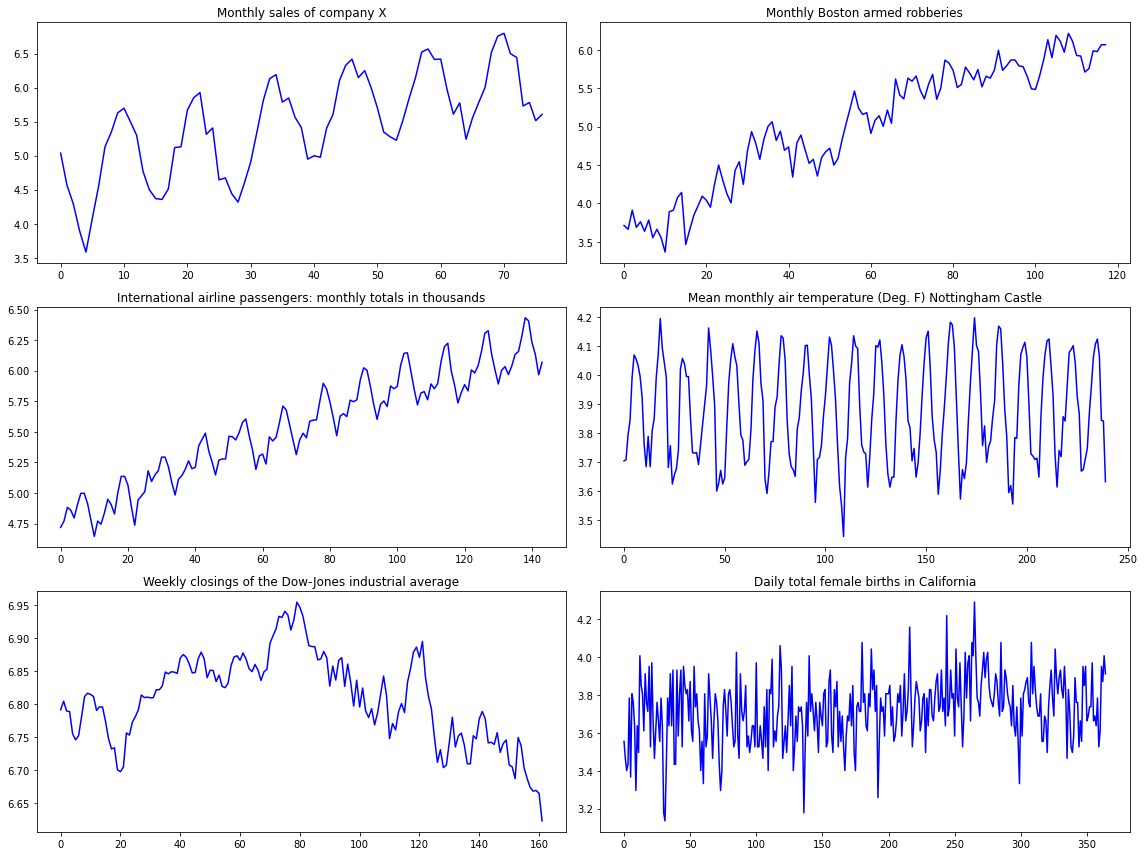

In [10]:
plt.figure(figsize=(16, 12))
plt.subplot(3,2,1)
plt.plot(series1, color='blue')
plt.title("Monthly sales of company X")
plt.subplot(3,2,2)
plt.plot(series2, color='blue')
plt.title("Monthly Boston armed robberies")
plt.subplot(3,2,3)
plt.plot(series3, color='blue')
plt.title("International airline passengers: monthly totals in thousands")
plt.subplot(3,2,4)
plt.plot(series4, color='blue')
plt.title("Mean monthly air temperature (Deg. F) Nottingham Castle")
plt.subplot(3,2,5)
plt.plot(series5, color='blue')
plt.title("Weekly closings of the Dow-Jones industrial average")
plt.subplot(3,2,6)
plt.plot(series6, color='blue')
plt.title("Daily total female births in California")
plt.tight_layout()

Дифференцируем

In [11]:
# Для достижения стационарности 3-его временного ряда применим к нему двойное дифференцирование
series1 = np.diff(series1,1)
series2 = np.diff(series2,1)
series3 = np.diff(series3,2)
series4 = np.diff(series4,1)
series5 = np.diff(series5,1)
series6 = np.diff(series6,1)

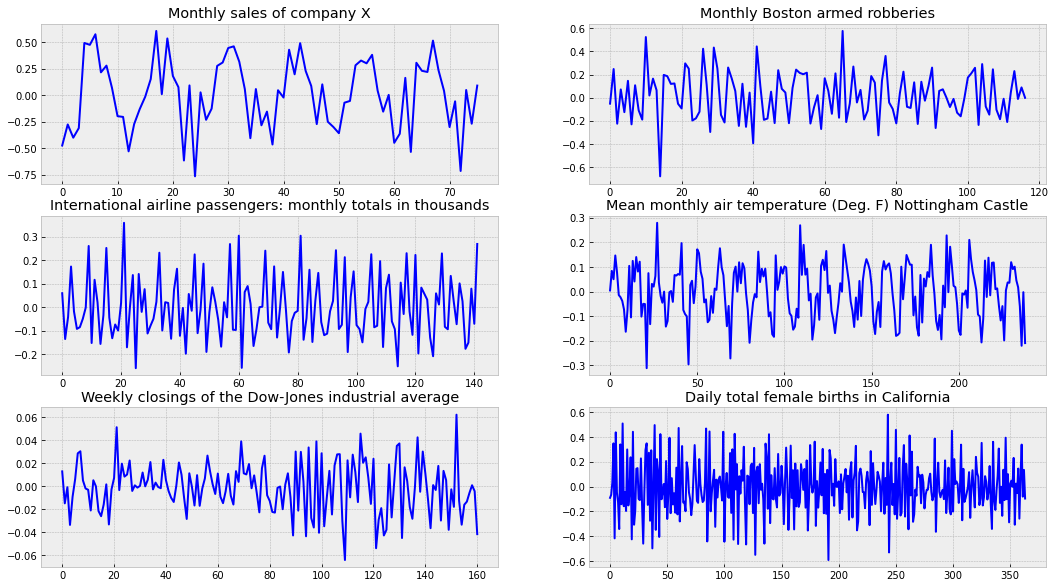

In [12]:
with plt.style.context('bmh'):
        plt.figure(figsize=(18, 10))
        plt.subplot(3,2,1)
        plt.plot(series1, color='blue')
        plt.title("Monthly sales of company X")
        plt.subplot(322)
        plt.plot(series2, color='blue')
        plt.title("Monthly Boston armed robberies")
        plt.subplot(323)
        plt.plot(series3, color='blue')
        plt.title("International airline passengers: monthly totals in thousands")
        plt.subplot(324)
        plt.plot(series4, color='blue')
        plt.title("Mean monthly air temperature (Deg. F) Nottingham Castle")
        plt.subplot(325)
        plt.plot(series5, color='blue')
        plt.title("Weekly closings of the Dow-Jones industrial average")
        plt.subplot(326)
        plt.plot(series6, color='blue')
        plt.title("Daily total female births in California")

Тест Дики-Фуллера

In [13]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

1. Согласно тесту Дики-Фуллера первый ряд "Monthly sales of company X" и второй ряд "Monthly Boston armed robberies" стационарны, о чем свидетельствует p-value < 2.5% и значение близкое к нулю соответственно.
2. Ряд "International airline passengers: monthly totals in thousands" не является стационарным на основе p-value более 7% в случае дифференцировния. Однако вторичное дифференцирование приводит к значениею p-value близкому к нулю и можно делать вывод о стационарности ряда.
3. Ряды "Mean monthly air temperature (Deg. F) Nottingham Castle", "Weekly closings of the Dow-Jones industrial average", "Daily total female births in California" на основе p-value практически равным 0 являются стационарными.

In [14]:
test_stationarity(series1)
test_stationarity(all_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [15]:
test_stationarity(series2)
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [16]:
test_stationarity(series3)
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
test_stationarity(series4)
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


In [18]:
test_stationarity(series5)
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


In [19]:
test_stationarity(series6)
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


Коррелограммы

In [20]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Monthly sales of company X


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


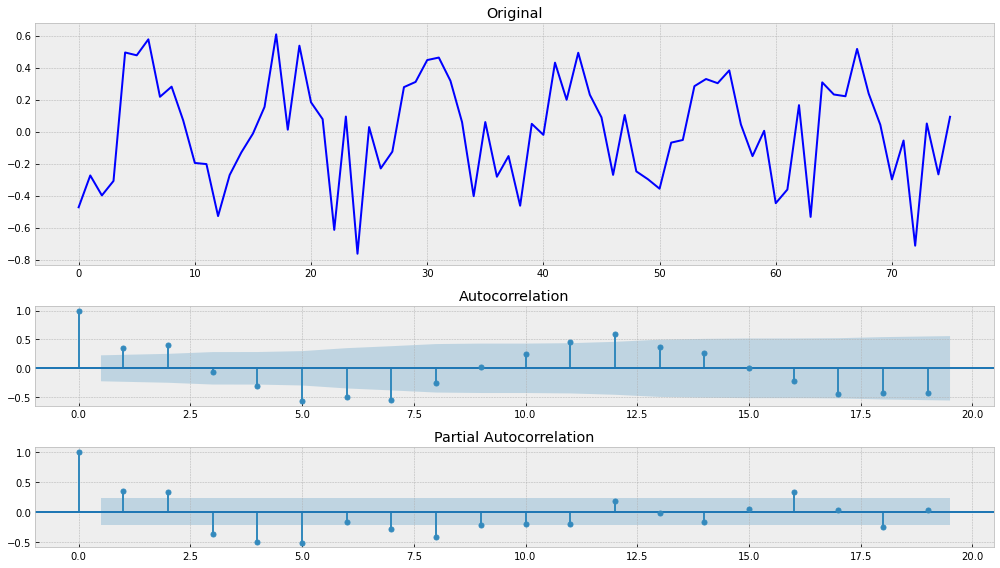

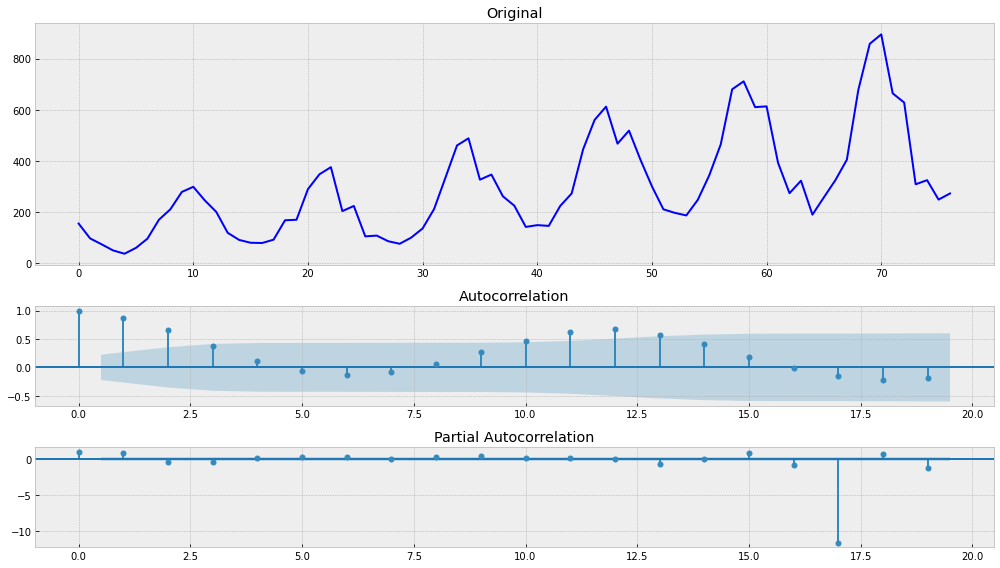

In [21]:
print("Monthly sales of company X")
tsplot(series1)
tsplot(all_series["Monthly sales of company X"])

Monthly Boston armed robberies


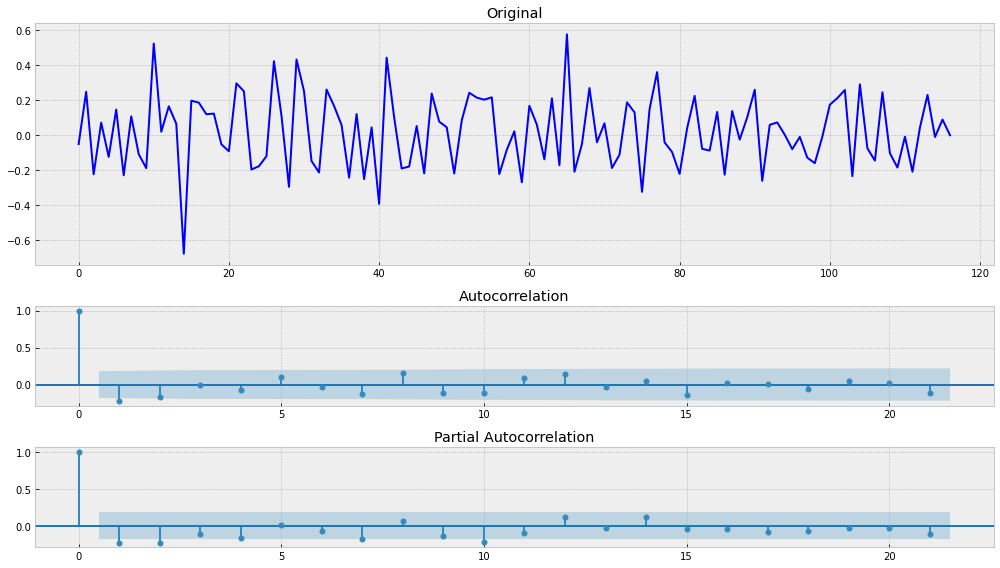

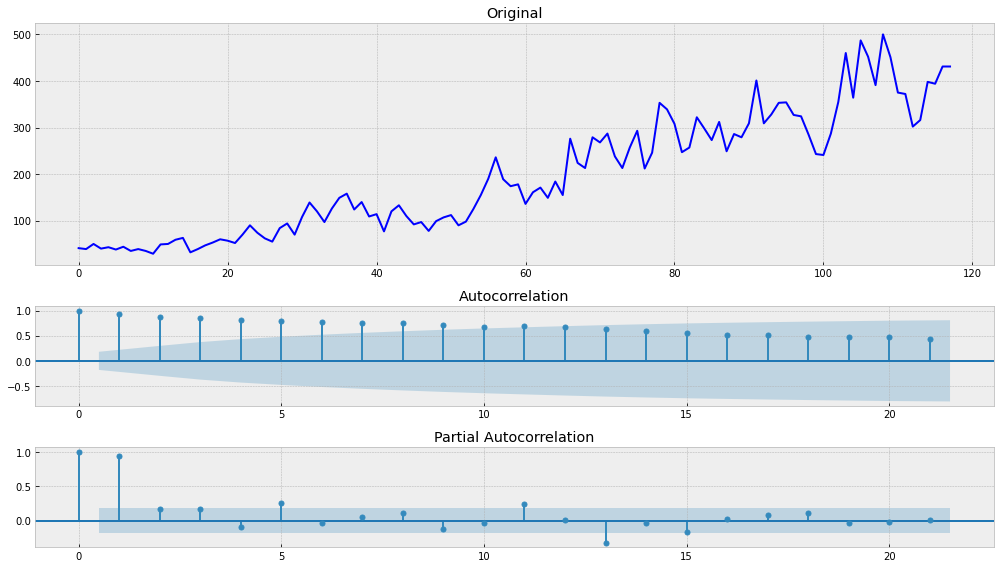

In [22]:
print("Monthly Boston armed robberies")
tsplot(series2)
tsplot(all_series["Monthly Boston armed robberies"])

International airline passengers: monthly totals in thousands


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


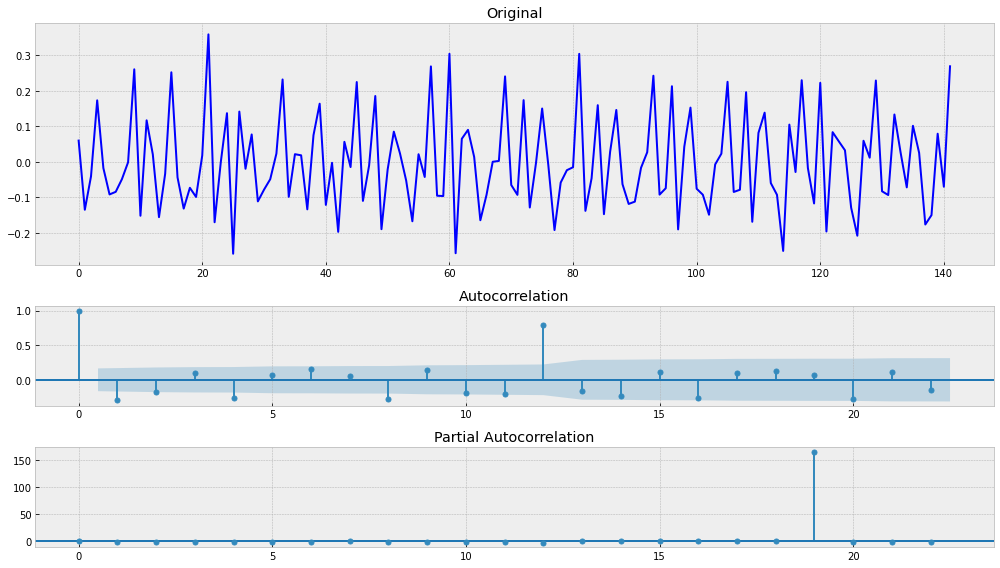

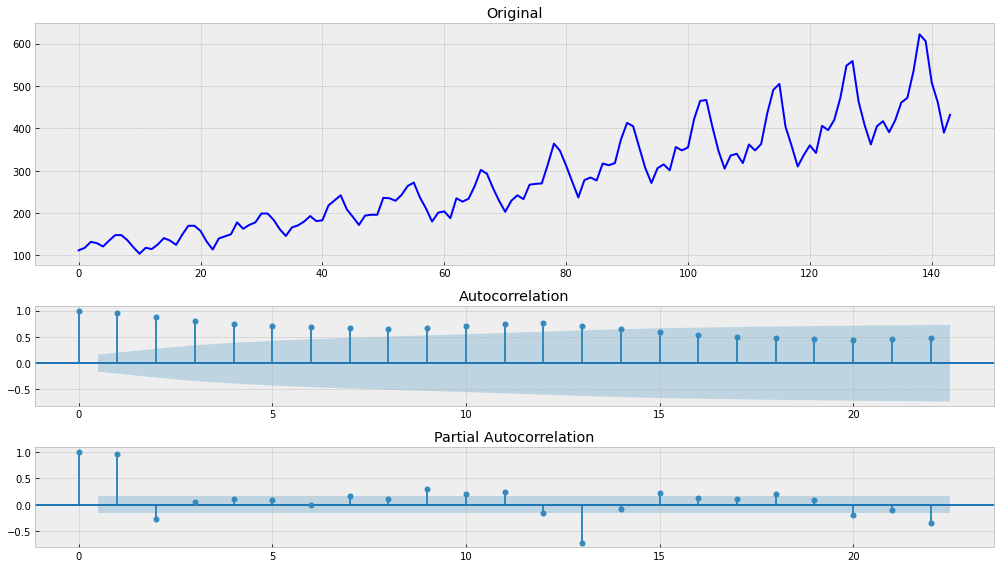

In [23]:
print("International airline passengers: monthly totals in thousands")
tsplot(series3)
tsplot(all_series["International airline passengers: monthly totals in thousands"])

Mean monthly air temperature (Deg. F) Nottingham Castle


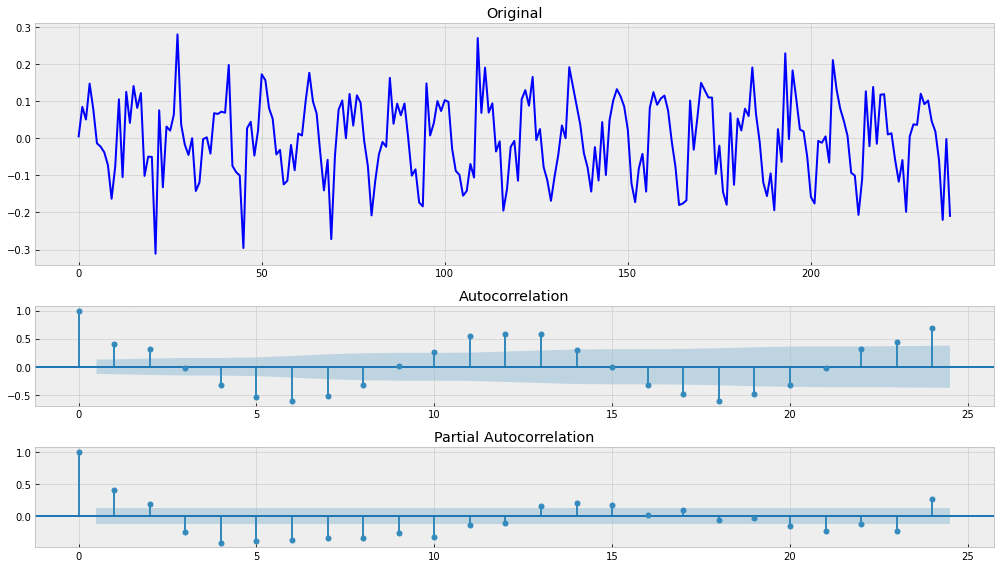

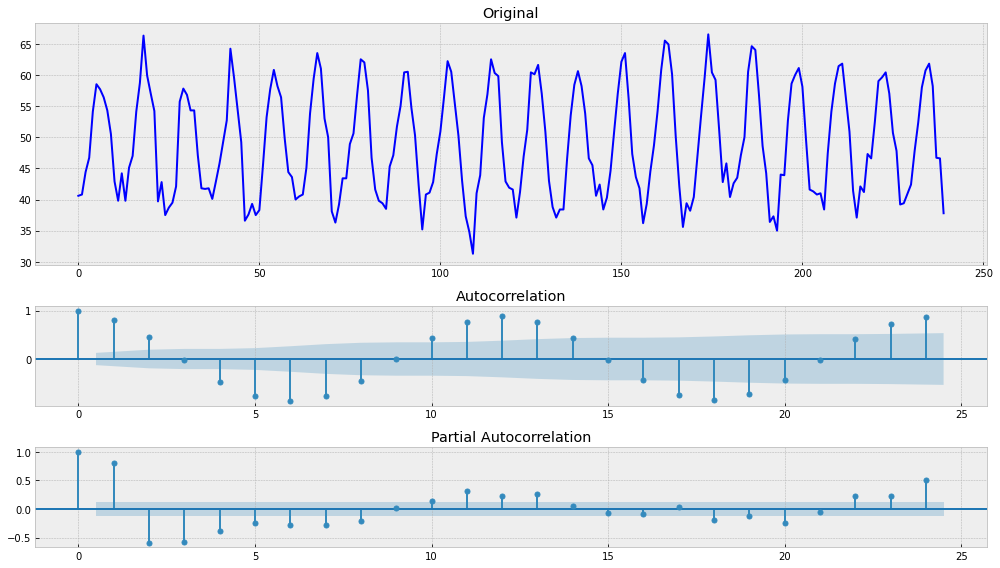

In [24]:
print("Mean monthly air temperature (Deg. F) Nottingham Castle")
tsplot(series4)
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Weekly closings of the Dow-Jones industrial average


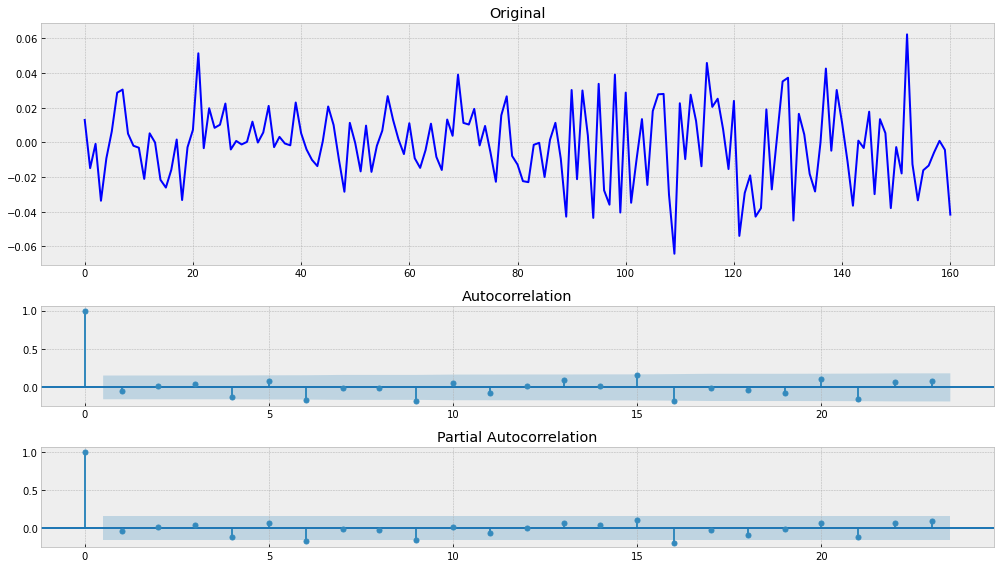

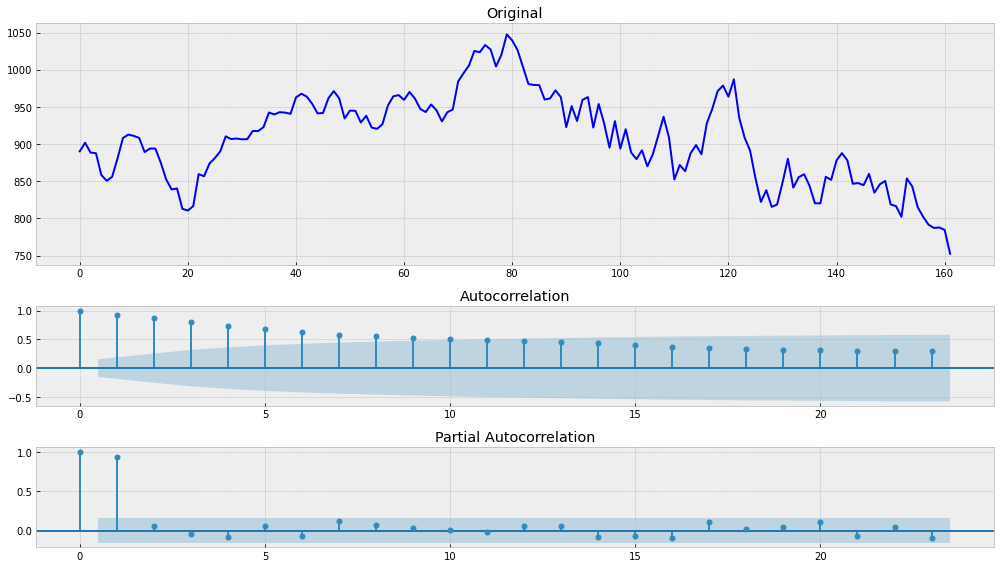

In [25]:
print("Weekly closings of the Dow-Jones industrial average")
tsplot(series5)
tsplot(all_series["Weekly closings of the Dow-Jones industrial average"])

Daily total female births in California


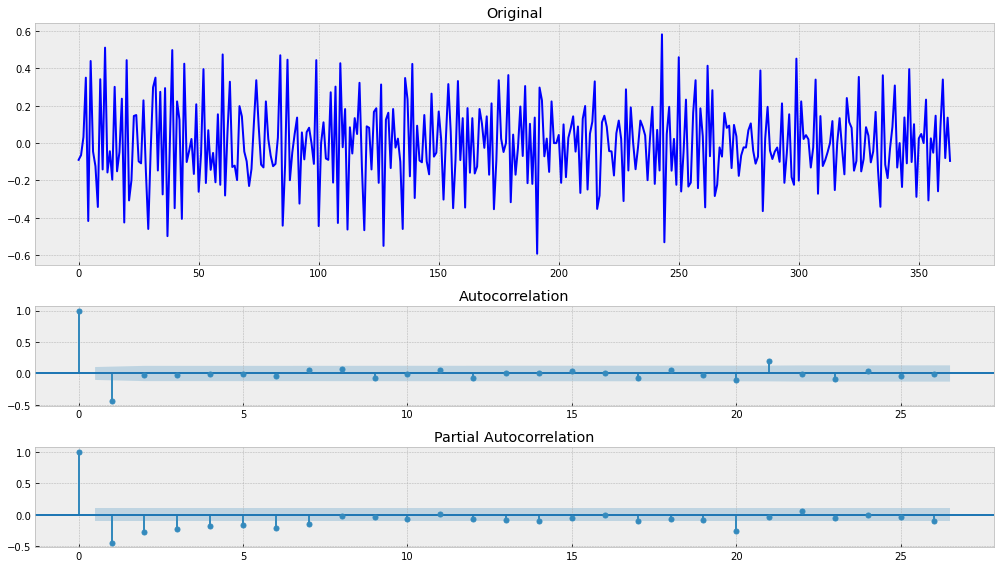

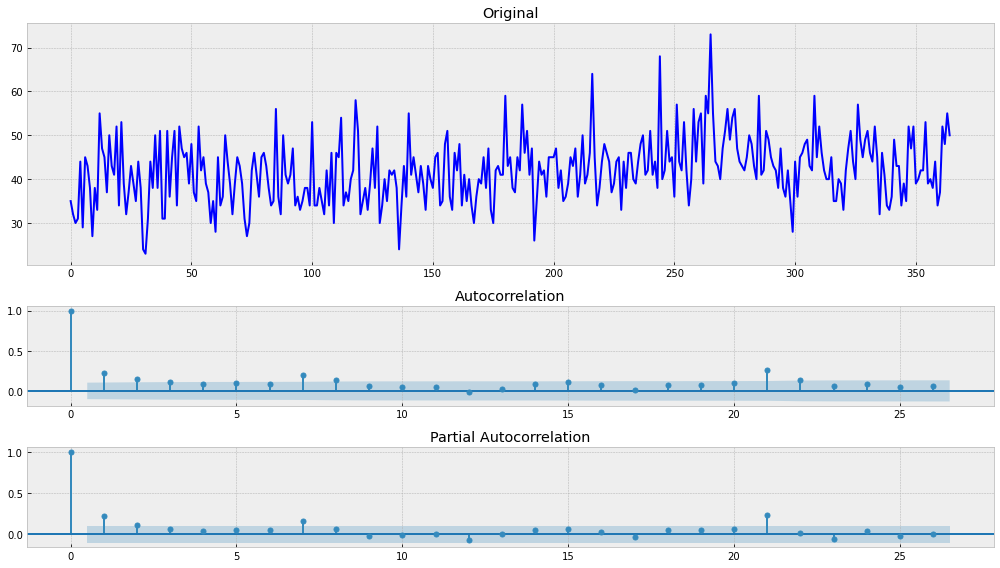

In [26]:
print("Daily total female births in California")
tsplot(series6)
tsplot(all_series["Daily total female births in California"])